Importing Required Libraries

In [ ]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Extracting data and assigning in Variables

In [ ]:
#Extracting
datazip = zipfile.ZipFile("./cats_and_dogs_filtered.zip", 'r')
datazip.extractall("tmp/")
datazip.close()

#Assigning training and validation directory

data_dir = 'tmp/cats_and_dogs_filtered'
train_dir = os.path.join(data_dir, 'train')
validation_dir = os.path.join(data_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

Creating Model

In [ ]:
def create_model():
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(loss='binary_crossentropy',
                optimizer=RMSprop(learning_rate=1e-4),
                metrics=['accuracy'])
  
  return model

Data Processing 

Data Processing, Data Augmentation and Model Creation

In [ ]:
model = create_model()
EPOCHS = 50

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=EPOCHS,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/50
100/100 - 26s - loss: 0.6944 - accuracy: 0.5070 - val_loss: 0.6806 - val_accuracy: 0.5880 - 26s/epoch - 262ms/step
Epoch 2/50
100/100 - 16s - loss: 0.6850 - accuracy: 0.5510 - val_loss: 0.6607 - val_accuracy: 0.6080 - 16s/epoch - 160ms/step
Epoch 3/50
100/100 - 16s - loss: 0.6718 - accuracy: 0.5800 - val_loss: 0.6504 - val_accuracy: 0.6090 - 16s/epoch - 160ms/step
Epoch 4/50
100/100 - 17s - loss: 0.6526 - accuracy: 0.6135 - val_loss: 0.6244 - val_accuracy: 0.6270 - 17s/epoch - 166ms/step
Epoch 5/50
100/100 - 19s - loss: 0.6324 - accuracy: 0.6315 - val_loss: 0.5887 - val_accuracy: 0.6750 - 19s/epoch - 192ms/step
Epoch 6/50
100/100 - 16s - loss: 0.6217 - accuracy: 0.6470 - val_loss: 0.5680 - val_accuracy: 0.6940 - 16s/epoch - 160ms/step
Epoch 7/50
100/100 - 16s - loss: 0.6078 - accuracy: 0.6630 - val_loss: 0.5571 - val_accuracy: 0.7020 - 16s/epoch - 159ms/step
Epoch 8/50
100/100 - 16s - loss: 0

Plotting Accuray graph

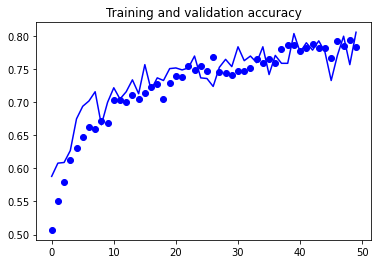

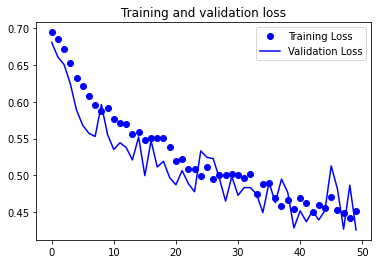

In [ ]:
t_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(t_acc))

plt.plot(epochs, t_acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()